___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 7: Supervised learning

## Lab work 7


#### Мета: 

* навчитися використовувати моделі з учителем

### Завдання 1:

Для цього завдання ми будемо вивчати загальнодоступні дані з [LendingClub.com](attachment:./www.lendingclub.com). 

Кредитний клуб пов'язує людей, яким потрібні гроші (позичальники), та людей, які мають гроші (інвесторів). Сподіваємось, як інвестор ви хотіли б інвестувати в людей, які продемонстрували, що вони мають високу ймовірність повернути вам гроші. Ми спробуємо створити модель, яка допоможе це передбачити.

Кредитний клуб мав [дуже цікавий 2016 рік](https://en.wikipedia.org/wiki/Lending_Club#2016), тож давайте перевіримо деякі їх дані.

Ми використовуватимемо дані про позики за 2007-2010 роки та намагатимемося класифікувати та прогнозувати, чи повертав позичальник їх повністю.

Ось що представляють стовпці:
* `credit.policy`: 1, якщо клієнт відповідає критеріям андеррайтингу кредитів LendingClub.com, і 0 в іншому випадку.

* `purpose`: мета позики (приймає значення "кредитна_карта", "консолідація боргу", "освітня", "основна_покупка", "малий бізнес" та "всі_інші").

* `int.rate`: процентна ставка позики, пропорційно (ставка 11% зберігатиметься як 0,11). Позичальникам, які LendingClub.com вважає більш ризикованими, призначаються вищі процентні ставки.

* `installment`: щомісячні виплати позичальника, якщо позика фінансується.

* `log.annual.inc`: журнал річного доходу позичальника, який самостійно звітується.

* `dti`: відношення боргу до доходу позичальника (сума боргу, поділена на річний дохід).

* `fico`: кредитний рейтинг позичальника FICO.

* `days.with.cr.line`: кількість днів, коли позичальник мав кредитну лінію.

* `revol.bal`: кредитний залишок позичальника (сума не виплачена в кінці циклу виставлення рахунків за кредитною карткою).

* `revol.util`: коефіцієнт використання кридитної лінії позичальника (сума використаної кредитної лінії відносно загальної кількості доступних кредитів).

* `inq.last.6mths`: кількість запитів позичальників з боку кредиторів за останні 6 місяців.

* `delinq.2yrs`: кількість разів, протягом яких позичальник прострочував платежі протягом останніх 2 років понад 30 днів.

* `pub.rec`: кількість публічних записів (заяви про банкрутство, податкова застава або рішення).

Алгоритм виконання та проміжні завдання:
1. Відкрийте файл та виведіть описову статистику

2. Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.

3. Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

4. Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції

5. purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies

6. Розбийте датасет на тестві та трейнові дані

7. Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost

8. Для кожної з моделей виведіть матрицю, основні метрики

8. *Використейте бібіотеку dtreeviz для візуалізації (там, де актуально)

9. Використайте ансамбель voting для всіх моделей

10. Порівняйте результати моделей та зробіть висновки

In [120]:
!pip install dtreeviz


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [50]:
#Відкрийте файл та виведіть описову статистику

import pandas as pd

df = pd.read_csv('loan_data.csv')
df.describe() #виводимо описову статистику

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


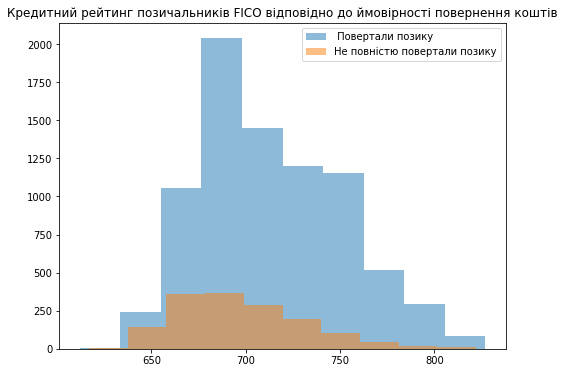

In [20]:
#Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1)

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
plt.hist(df[df['not.fully.paid'] == 0]['fico'], bins=10, alpha=0.5, label=' Повертали позику')

plt.hist(df[df['not.fully.paid'] == 1]['fico'], bins=10, alpha=0.5, label='Не повністю повертали позику')

plt.legend(loc='upper right')
plt.title('Кредитний рейтинг позичальників FICO відповідно до ймовірності повернення коштів')
plt.show()

# З гістограми наглядно бачимо що чим вищий кредитний рейтинг позичальника тим більша ймовірність, що він поверне позику

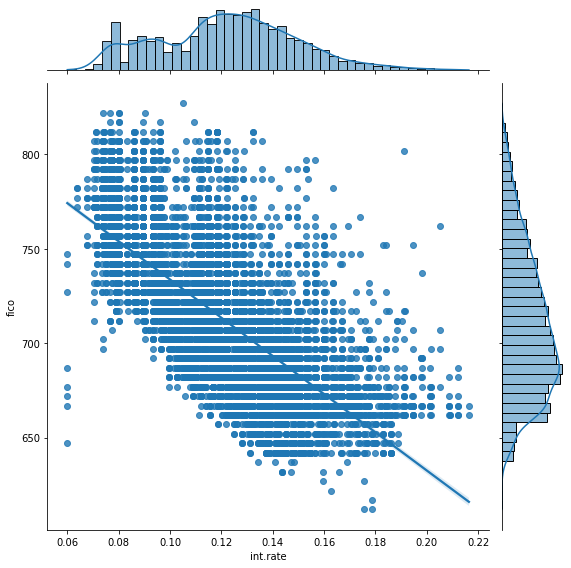

In [39]:
#3. Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

import seaborn as sns

sns.jointplot(x='int.rate', y='fico', data=df[['int.rate', 'fico']], kind='reg', height=8, ratio=6)
plt.show()

# На графіку ми бачимо негативну тенденцію.
# Оскільки позичальники з нищим рейтингом з більшою ймовірністю не повернуть позику = більший ризик > більша ставка int rate
# Але (!) є певні позичальники з хорошим рейтингами FICO але їм були призначена висока процентна ставка позики 

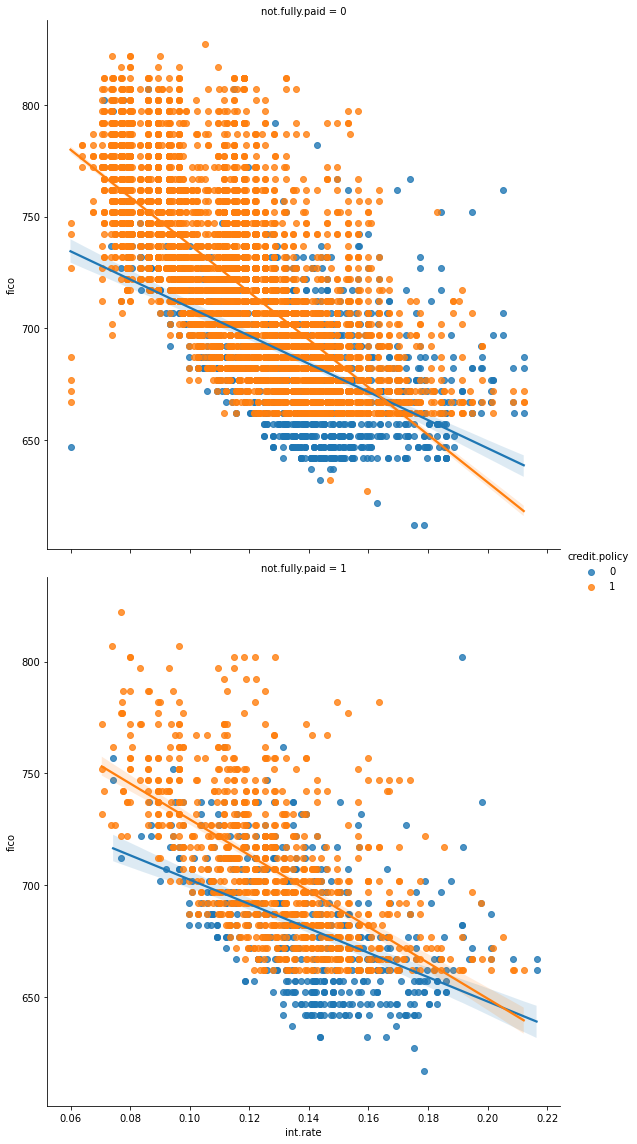

In [63]:
#4. Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy.
# Розбийте по значеннях цільової функції 
sns.lmplot(x='int.rate', y='fico', data=df, hue='credit.policy', row= 'not.fully.paid', height=8)

plt.show()

In [51]:
#5. purpose є категорієї, тперетворюємо за допомогою pd.get_dummies
df = pd.get_dummies(df, columns=['purpose'])

In [54]:
df.head(3)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0


In [67]:
#6. Розбийте датасет на тестві та трейнові дані
from sklearn.model_selection import train_test_split

X = df[['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec',
        'purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business']]
y = df['not.fully.paid']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [127]:
#7.1 Модель дерево рішень

from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(random_state=42)

model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

In [117]:
# 8.1 Матриця та основні метрики для моделі Дерево рішень
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

conf_matrix_forDT = confusion_matrix(y_test, y_pred)  #Матриця помилок
print(conf_matrix_forDT)

[[1338  277]
 [ 227   74]]


In [118]:
report_forDT = classification_report(y_test, y_pred) #Основні метрики класифікації
print(report_forDT)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1615
           1       0.21      0.25      0.23       301

    accuracy                           0.74      1916
   macro avg       0.53      0.54      0.53      1916
weighted avg       0.75      0.74      0.74      1916



In [128]:
# Візуалізація дерева
viz = dtreeviz(model1, X_train, y_train, target_name='class')
viz.view()

TypeError: TypeError: 'module' object is not callable

In [95]:
#7.2 Логістична регресія
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred = model2.predict(X_test)

In [96]:
#8.2 Матриця та основні метрики для моделі лінійної регресії

conf_matrix_forLR = confusion_matrix(y_test, y_pred)
print(conf_matrix_forLR)

[[1608    7]
 [ 298    3]]


In [97]:
report_forLR = classification_report(y_test, y_pred)
print(report_forLR)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1615
           1       0.30      0.01      0.02       301

    accuracy                           0.84      1916
   macro avg       0.57      0.50      0.47      1916
weighted avg       0.76      0.84      0.77      1916



In [99]:
#7.3 Random forest
from sklearn.ensemble import RandomForestClassifier

# визначаємо модель Random Forest з 100 деревами і обмеженням глибини дерева до max_depthрівнів
model3 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)

# навчаємо модель на тренувальній вибірці
model3.fit(X_train, y_train)

# здійснюємо передбачення на тестовій вибірці
y_pred = model3.predict(X_test)


In [100]:
#8.3 Матриця та основні метрики для моделі Random forest

conf_matrix_forRF = confusion_matrix(y_test, y_pred) 
print(conf_matrix_forRF)

[[1615    0]
 [ 301    0]]


In [101]:
report_forRF = classification_report(y_test, y_pred)
print(report_forRF)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1615
           1       0.00      0.00      0.00       301

    accuracy                           0.84      1916
   macro avg       0.42      0.50      0.46      1916
weighted avg       0.71      0.84      0.77      1916



/opt/python/envs/default/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [105]:
#7.4 XGBoost
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

model4 = XGBClassifier()
model4.fit(X_train, y_train)

# Здійснюємо класифікацію на тестових даних та виводимо accuracy
y_pred = model4.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

[20:16:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [107]:
#8.4  Матриця та основні метрики для моделі XGBoost

conf_matrix_forXGB = confusion_matrix(y_test, y_pred) 
print(conf_matrix_forRF)

[[1615    0]
 [ 301    0]]


In [108]:
report_forXGB= classification_report(y_test, y_pred) #Основні метрики класифікації
print(report_forXGB)

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1615
           1       0.37      0.09      0.14       301

    accuracy                           0.83      1916
   macro avg       0.61      0.53      0.53      1916
weighted avg       0.78      0.83      0.79      1916



In [ ]:
# 9. Використайте ансамбель voting для всіх моделей

In [ ]:
# 10. Порівняйте результати моделей та зробіть висновки

### Завдання 2:

Просте завдання на обробку часових рядів.

Потрібно вивести наступну інформацію: 
1. Виведіть список унікальних міст з датасету
2. Виведіть дату початку та кінця ведення даних
3. Яка середня конценрація $NO_2$ для кожного дня тижня і міста (виведіть таблицю)?
4. Яке середнє значення для кожної години (виведіть стовбчикову діаграму)?

In [2]:
url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/data/air_quality_no2_long.csv"

In [7]:
import pandas as pd
df = pd.read_csv(url, delimiter=',') 

In [10]:
# 1. Cписок унікальних міст з датасету
df['city'].unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [24]:
# 2. Виведіть дату початку та кінця ведення даних

df['date.utc'] = pd.to_datetime(df['date.utc'])
start_date = df['date.utc'].dt.date.min()
finish_date = df['date.utc'].dt.date.max()

print(f'Дату початку ведення даних: {start_date}. \nДата кінця ведення данних: {finish_date}.')

Дату початку ведення даних: 2019-05-07. 
Дата кінця ведення данних: 2019-06-21.


In [40]:
# 3. Средня конценрація NO2 для кожного дня тижня і міста

df['day'] = df['date.utc'].dt.day_name() # створюємо окремий стовпець з днем тижня

mean_by_day = df.pivot_table(values='value', index='city', columns='day', aggfunc='mean') # створюємо таблицю з середнім
mean_by_day

In [51]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mean_by_day = mean_by_day.reindex(columns=days) # сортуємо стовпці за вірним порядком днів тижня
mean_by_day

day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
city,,,,,,,
Antwerpen,27.875000,22.214286,21.125000,27.500000,28.400000,33.500000,21.896552
London,23.969697,24.885714,23.460432,24.780142,26.446809,24.977612,24.859155
Paris,24.856250,30.999359,29.165753,28.600690,31.617986,25.266154,23.274306


In [49]:
# 4. Знаходимо середнє значення для кожної години

df['hour'] = df['date.utc'].dt.hour # створюємо окремий стовпець з годинами вимірювання
mean_by_hour = df.pivot_table(values='value', index='city', columns='hour', aggfunc='mean')
mean_by_hour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
city,,,,,,,,,,,,,,,,,,,,,
Antwerpen,24.750000,25.838235,21.000000,21.333333,24.833333,29.500000,33.333333,37.666667,34.833333,27.666667,...,23.750000,29.250000,17.500000,18.500000,25.500000,30.750000,27.500000,25.750000,26.500000,23.000000
London,24.292683,24.757576,21.800000,21.536585,18.976190,19.048780,20.976190,21.452381,21.238095,21.857143,...,25.900000,28.682927,28.951220,30.073171,30.121951,29.560976,29.121951,28.853659,28.969697,28.414634
Paris,31.683333,27.433333,25.964286,25.234211,27.257895,35.534211,40.102381,40.569767,36.458140,30.076744,...,17.772093,18.854762,21.266667,23.585714,24.204762,26.635714,29.707143,33.237209,35.400000,34.288095


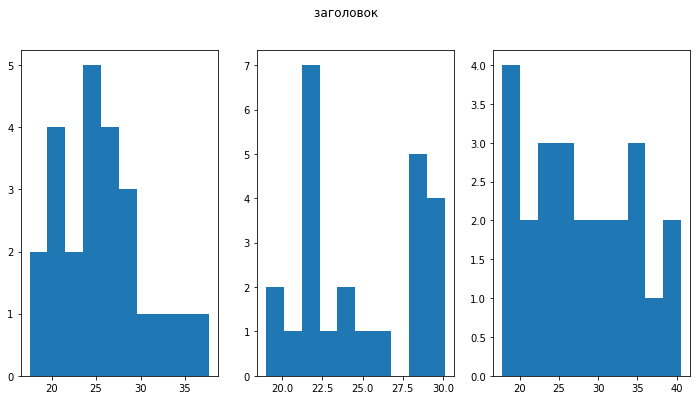

In [60]:
# Виводимо стовпчикову діаграму

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(12, 6))
fig.suptitle(' заголовок')

axs[0].hist(mean_by_hour.loc['Antwerpen'])

axs[1].hist(mean_by_hour.loc['London'])

axs[2].hist(mean_by_hour.loc['Paris'])


# показуємо діаграму
plt.show()